In [214]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/api-keyy/API_key.txt
/kaggle/input/usa-data/usa_data.csv
/kaggle/input/covidvaccine-tweets/covidvaccine.csv


In [215]:
# Reading data from the kaggle dataset

data = pd.read_csv("/kaggle/input/covidvaccine-tweets/covidvaccine.csv")
data.head()

/tmp/ipykernel_33/2966656182.py:3: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/covidvaccine-tweets/covidvaccine.csv")


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [216]:
#remove unneeded columns so data is easier to read

data = data.drop(columns=['user_description', 'user_created','user_followers','user_friends','user_favourites','source','is_retweet','user_verified','user_name'])
data['raw_text'] = data['text']
data.head()

,user_location,date,text,hashtags,raw_text
0,Assam,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Australia to Manufacture Covid-19 Vaccine and ...
1,NaN,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,NaN,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Deaths due to COVID-19 in Affected Countries\n...
3,NaN,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,"Adelaide, South Australia",18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,@michellegrattan @ConversationEDU This is what...


In [217]:
#remove any rows with NaN values 

data = data.dropna()
data.describe()

,user_location,date,text,hashtags,raw_text
count,267141,267141,267141,267141,267141
unique,36286,262678,266918,113944,266918
top,"Bengaluru, India",2021-07-20 13:30:00,Technically the world’s first #CovidVaccine is...,['CovidVaccine'],Technically the world’s first #CovidVaccine is...
freq,17286,13,13,49136,13


In [218]:
import nltk
# nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download the punkt and stopwords from nltk
# nltk.download('stopwords')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

In [219]:
#method to create a bag of words given text

def tokenize(text):
    word_tokens =  word_tokenize(text)
    #Filter the word tokens
    filtered  =  [w for w in word_tokens if not w.lower() in stop_words and w.isalpha()]
    return filtered
    

In [220]:
# grouped_data = data.groupby('user_location')
# grouped_data.describe()

In [221]:
#for now, just work with USA location (this list could be expanded)

states = ["Alabama" ,"Alaska" ,"Arizona" ,"Arkansas" ,"California" ,"Colorado" ,"Connecticut" ,"Delaware" ,"Florida" ,"Georgia" ,"Hawaii" ,"Idaho" ,
    "Illinois" ,"Indiana" ,"Iowa" ,"Kansas" ,"Kentucky" ,"Louisiana" ,"Maine" ,"Maryland" ,"Massachusetts" ,"Michigan" ,"Minnesota" ,"Mississippi" ,"Missouri" ,
    "Montana" ,"Nebraska", "Nevada" ,"New Hampshire" ,"New Jersey" ,"New Mexico" ,"New York" ,"North Carolina" ,"North Dakota" ,"Ohio" ,"Oklahoma" ,"Oregon" ,
    "Pennsylvania" ,"Rhode Island" ,"South Carolina" ,"South Dakota" ,"Tennessee" ,"Texas" ,"Utah" ,"Vermont" ,"Virginia" ,"Washington" ,"West Virginia" ,
    "Wisconsin" ,"Wyoming", "USA", "United States", "America", "United States of America", "US" ]

data['user_location'] = data['user_location'].str.lower()
states = [state.lower() for state in states]


#create a dataset which only has the data where the user_location is in the above list

usa_data = data[data['user_location'].isin(states)]
usa_data

,user_location,date,text,hashtags,raw_text
46,united states,18-08-2020 03:14,Just so we’re clear on how I feel about a #cov...,['covidvaccine'],Just so we’re clear on how I feel about a #cov...
84,united states,17-08-2020 17:52,Just enrolled into a pivotal phase 3 clinical ...,['CovidVaccine'],Just enrolled into a pivotal phase 3 clinical ...
87,massachusetts,17-08-2020 16:42,$GERN up 7% today.... It's either going to cur...,['BloodCancer'],$GERN up 7% today.... It's either going to cur...
208,usa,16-08-2020 18:22,#5G the silent killer just like #DirectedEnerg...,"['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...",#5G the silent killer just like #DirectedEnerg...
308,united states,16-08-2020 01:02,Who had this on their 2020 bingo card? #vaccin...,"['vaccines', 'COVID19', 'CovidVaccine']",Who had this on their 2020 bingo card? #vaccin...
...,...,...,...,...,...
399506,new york,2022-09-06 19:04:48,Many Young Kids With COVID Show No Symptoms of...,"['ASYMPTOMATICCOVID', 'CORONAVIRUS', 'COVID', ...",Many Young Kids With COVID Show No Symptoms of...
399524,michigan,2022-09-06 17:01:28,@cvspharmacy: I am honestly not sure how to an...,['CovidVaccine'],@cvspharmacy: I am honestly not sure how to an...
399536,massachusetts,2022-09-06 15:08:23,@maura_healey How is your investigation into t...,"['BigPharma', 'InformedConsent', 'CovidVaccine...",@maura_healey How is your investigation into t...
399546,alabama,2022-09-06 13:31:14,HUH? #Pfizer’s CEO implies mRNA technology was...,"['Pfizer', 'COVID19', 'CovidVaccine']",HUH? #Pfizer’s CEO implies mRNA technology was...


In [222]:
usa_data['date'][:196]

46         18-08-2020 03:14
84         17-08-2020 17:52
87         17-08-2020 16:42
208        16-08-2020 18:22
308        16-08-2020 01:02
               ...         
7911       17-09-2020 22:21
7942       17-09-2020 19:03
7975       17-09-2020 14:45
8082       16-09-2020 22:15
8211    2020-09-30 13:44:46
Name: date, Length: 196, dtype: object

In [223]:
import pandas as pd
from datetime import datetime

# Initialize a new list to store the converted date-only values
date_only_list = []

# Define the transition index where the date format changes
transition_index = 195

# Process the dates with the appropriate format
for idx, date in enumerate(usa_data['date']):
    try:
        if idx < transition_index:
            # Format for the first part
            datetime_object = datetime.strptime(date, '%d-%m-%Y %H:%M')
        else:
            # Format for the second part
            datetime_object = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        date_only_list.append(datetime_object.date())
    except ValueError as e:
        print(f"Error parsing date {date}: {e}")
        date_only_list.append(None)  # Append None for error cases

# Create a new column in the DataFrame to store the date-only values
usa_data['date_only'] = date_only_list

# Output the updated DataFrame to verify the new column
print(usa_data['date_only'])


46        2020-08-18
84        2020-08-17
87        2020-08-17
208       2020-08-16
308       2020-08-16
             ...    
399506    2022-09-06
399524    2022-09-06
399536    2022-09-06
399546    2022-09-06
399576    2022-09-06
Name: date_only, Length: 14196, dtype: object


/tmp/ipykernel_33/3650497081.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['date_only'] = date_only_list


In [224]:
usa_data

,user_location,date,text,hashtags,raw_text,date_only
46,united states,18-08-2020 03:14,Just so we’re clear on how I feel about a #cov...,['covidvaccine'],Just so we’re clear on how I feel about a #cov...,2020-08-18
84,united states,17-08-2020 17:52,Just enrolled into a pivotal phase 3 clinical ...,['CovidVaccine'],Just enrolled into a pivotal phase 3 clinical ...,2020-08-17
87,massachusetts,17-08-2020 16:42,$GERN up 7% today.... It's either going to cur...,['BloodCancer'],$GERN up 7% today.... It's either going to cur...,2020-08-17
208,usa,16-08-2020 18:22,#5G the silent killer just like #DirectedEnerg...,"['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...",#5G the silent killer just like #DirectedEnerg...,2020-08-16
308,united states,16-08-2020 01:02,Who had this on their 2020 bingo card? #vaccin...,"['vaccines', 'COVID19', 'CovidVaccine']",Who had this on their 2020 bingo card? #vaccin...,2020-08-16
...,...,...,...,...,...,...
399506,new york,2022-09-06 19:04:48,Many Young Kids With COVID Show No Symptoms of...,"['ASYMPTOMATICCOVID', 'CORONAVIRUS', 'COVID', ...",Many Young Kids With COVID Show No Symptoms of...,2022-09-06
399524,michigan,2022-09-06 17:01:28,@cvspharmacy: I am honestly not sure how to an...,['CovidVaccine'],@cvspharmacy: I am honestly not sure how to an...,2022-09-06
399536,massachusetts,2022-09-06 15:08:23,@maura_healey How is your investigation into t...,"['BigPharma', 'InformedConsent', 'CovidVaccine...",@maura_healey How is your investigation into t...,2022-09-06
399546,alabama,2022-09-06 13:31:14,HUH? #Pfizer’s CEO implies mRNA technology was...,"['Pfizer', 'COVID19', 'CovidVaccine']",HUH? #Pfizer’s CEO implies mRNA technology was...,2022-09-06


In [225]:
# USA_grouped_data = usa_data.groupby('user_location')
# USA_grouped_data.describe()

In [226]:
import re
import string

def clean_text(text): #from https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis
#     print(text)
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text 

def clean_text_basic(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text 


def remove_emoji(text): #from https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text) 

# clean the text, remove emojis, and then tokenize it 
usa_data['clean_text']=usa_data['text'].apply(lambda x: remove_emoji(x))
usa_data['clean_text']=usa_data['text'].apply(lambda x: clean_text_basic(x))
usa_data['text'] = usa_data['text'].apply(lambda x: clean_text(x))
usa_data['text']=usa_data['text'].apply(lambda x: remove_emoji(x))
usa_data['text'] = usa_data['text'].apply(lambda x: tokenize(x))
usa_data.head()

/tmp/ipykernel_33/1604789098.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['clean_text']=usa_data['text'].apply(lambda x: remove_emoji(x))
/tmp/ipykernel_33/1604789098.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['clean_text']=usa_data['text'].apply(lambda x: clean_text_basic(x))
/tmp/ipykernel_33/1604789098.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,user_location,date,text,hashtags,raw_text,date_only,clean_text
46,united states,18-08-2020 03:14,"[clear, feel, covidvaccine]",['covidvaccine'],Just so we’re clear on how I feel about a #cov...,2020-08-18,just so we’re clear on how i feel about a #cov...
84,united states,17-08-2020 17:52,"[enrolled, pivotal, phase, clinical, trial, co...",['CovidVaccine'],Just enrolled into a pivotal phase 3 clinical ...,2020-08-17,just enrolled into a pivotal phase clinical t...
87,massachusetts,17-08-2020 16:42,"[gern, today, either, going, cure, bloodcancer...",['BloodCancer'],$GERN up 7% today.... It's either going to cur...,2020-08-17,$gern up % today.... it's either going to cure...
208,usa,16-08-2020 18:22,"[silent, killer, like, directedenergyweapons, ...","['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...",#5G the silent killer just like #DirectedEnerg...,2020-08-16,# the silent killer just like #directedenergyw...
308,united states,16-08-2020 01:02,"[bingo, card, vaccines, covidvaccine]","['vaccines', 'COVID19', 'CovidVaccine']",Who had this on their 2020 bingo card? #vaccin...,2020-08-16,who had this on their bingo card? #vaccines #...


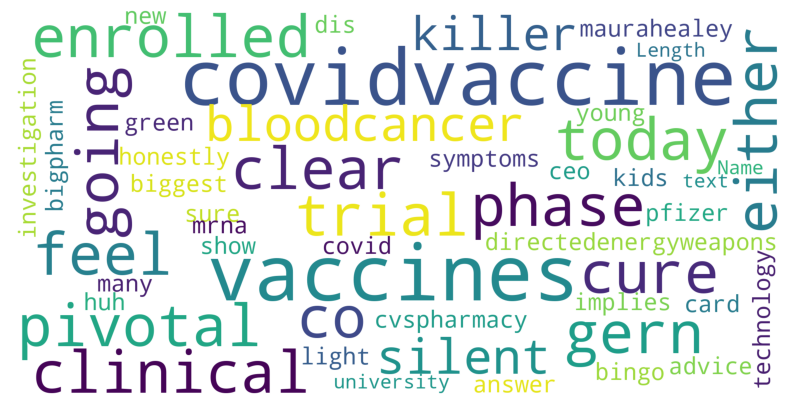

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# from https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis
#make a word cloud of the most common words of the USA data text

word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(usa_data['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [228]:
usa_data.head()

,user_location,date,text,hashtags,raw_text,date_only,clean_text
46,united states,18-08-2020 03:14,"[clear, feel, covidvaccine]",['covidvaccine'],Just so we’re clear on how I feel about a #cov...,2020-08-18,just so we’re clear on how i feel about a #cov...
84,united states,17-08-2020 17:52,"[enrolled, pivotal, phase, clinical, trial, co...",['CovidVaccine'],Just enrolled into a pivotal phase 3 clinical ...,2020-08-17,just enrolled into a pivotal phase clinical t...
87,massachusetts,17-08-2020 16:42,"[gern, today, either, going, cure, bloodcancer...",['BloodCancer'],$GERN up 7% today.... It's either going to cur...,2020-08-17,$gern up % today.... it's either going to cure...
208,usa,16-08-2020 18:22,"[silent, killer, like, directedenergyweapons, ...","['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...",#5G the silent killer just like #DirectedEnerg...,2020-08-16,# the silent killer just like #directedenergyw...
308,united states,16-08-2020 01:02,"[bingo, card, vaccines, covidvaccine]","['vaccines', 'COVID19', 'CovidVaccine']",Who had this on their 2020 bingo card? #vaccin...,2020-08-16,who had this on their bingo card? #vaccines #...


In [229]:
USA_grouped_data = usa_data.groupby('date_only')
USA_grouped_data.head()

,user_location,date,text,hashtags,raw_text,date_only,clean_text
46,united states,18-08-2020 03:14,"[clear, feel, covidvaccine]",['covidvaccine'],Just so we’re clear on how I feel about a #cov...,2020-08-18,just so we’re clear on how i feel about a #cov...
84,united states,17-08-2020 17:52,"[enrolled, pivotal, phase, clinical, trial, co...",['CovidVaccine'],Just enrolled into a pivotal phase 3 clinical ...,2020-08-17,just enrolled into a pivotal phase clinical t...
87,massachusetts,17-08-2020 16:42,"[gern, today, either, going, cure, bloodcancer...",['BloodCancer'],$GERN up 7% today.... It's either going to cur...,2020-08-17,$gern up % today.... it's either going to cure...
208,usa,16-08-2020 18:22,"[silent, killer, like, directedenergyweapons, ...","['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...",#5G the silent killer just like #DirectedEnerg...,2020-08-16,# the silent killer just like #directedenergyw...
308,united states,16-08-2020 01:02,"[bingo, card, vaccines, covidvaccine]","['vaccines', 'COVID19', 'CovidVaccine']",Who had this on their 2020 bingo card? #vaccin...,2020-08-16,who had this on their bingo card? #vaccines #...
...,...,...,...,...,...,...,...
399506,new york,2022-09-06 19:04:48,"[many, young, kids, covid, show, symptoms, dis...","['ASYMPTOMATICCOVID', 'CORONAVIRUS', 'COVID', ...",Many Young Kids With COVID Show No Symptoms of...,2022-09-06,many young kids with covid show no symptoms of...
399524,michigan,2022-09-06 17:01:28,"[cvspharmacy, honestly, sure, answer, advice, ...",['CovidVaccine'],@cvspharmacy: I am honestly not sure how to an...,2022-09-06,@cvspharmacy: i am honestly not sure how to an...
399536,massachusetts,2022-09-06 15:08:23,"[maurahealey, investigation, biggest, bigpharm...","['BigPharma', 'InformedConsent', 'CovidVaccine...",@maura_healey How is your investigation into t...,2022-09-06,@maura_healey how is your investigation into t...
399546,alabama,2022-09-06 13:31:14,"[huh, pfizer, ceo, implies, mrna, technology, ...","['Pfizer', 'COVID19', 'CovidVaccine']",HUH? #Pfizer’s CEO implies mRNA technology was...,2022-09-06,huh? #pfizer’s ceo implies mrna technology was...


In [230]:
usa_data['date_only'] = pd.to_datetime(usa_data['date_only'])

groups = usa_data.groupby(usa_data['date_only'].dt.year)

# Creating a dictionary of dataframes, with each key representing a year
USA_by_year = {year: group for year, group in groups}

/tmp/ipykernel_33/2529443365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['date_only'] = pd.to_datetime(usa_data['date_only'])


In [231]:
#modified from https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis to be a more general method
def make_word_cloud(dataframe):
    word_cloud = WordCloud(
                        background_color='white',
#                         stopwords=set(STOPWORDS),
                        max_words=50,
                        max_font_size=40,
                        scale=5,
                        random_state=1).generate(str(dataframe['text']))
    fig = plt.figure(1, figsize=(5,5))
    plt.axis('off')
#     plt.title('Date: '+ dataframe['month'].iloc[0], fontsize=30)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

In [232]:
#compare general word cloud and then see what differentiates the word clouds
# pair-wise tf-idf (3 months at a time, previous, current, and next)...ranks words by rarity and frequency (how important terms are)...look at week 7
#


# could remove all hashtag words from text (make a .apply and go through hashtags and remove from text and add to new column)
# https://hedonometer.org/timeseries/en_all/?from=2020-01-01&to=2020-12-31

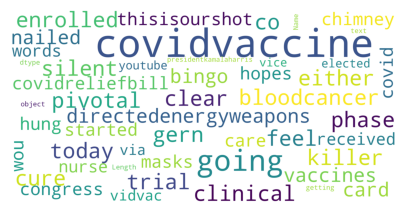

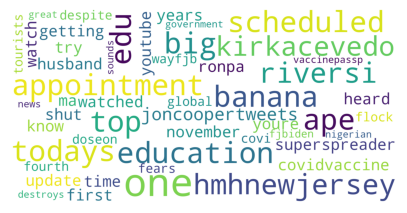

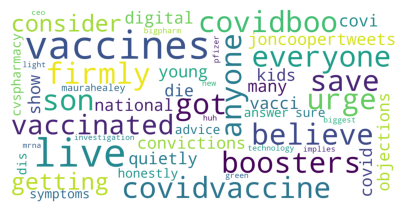

In [233]:
make_word_cloud(USA_by_year[2020])
make_word_cloud(USA_by_year[2021])
make_word_cloud(USA_by_year[2022])

In [234]:
# Grouping by year and month
groups = usa_data.groupby([usa_data['date_only'].dt.year, usa_data['date_only'].dt.month])

# Creating a dictionary of dataframes, with each key representing a year-month combination
dataframes_by_year_month = {(year, month): group for (year, month), group in groups}


for year in range(2020,2023):
    if year == 2020:
        for month in range(8,13):
            print('Year: '+ str(year)+', Month: '+ str(month))
            make_word_cloud(dataframes_by_year_month[(year, month)])
    if year == 2022:
        for month in range(1,10):
            print('Year: '+ str(year)+', Month: '+ str(month))
            make_word_cloud(dataframes_by_year_month[(year, month)])
    if year == 2021:
        for month in range(1,13):
            print('Year: '+ str(year)+', Month: '+ str(month))
            make_word_cloud(dataframes_by_year_month[(year, month)])

# Embeddings

**Embeddings: Ran this and then stored in file...now using file as input**

In [235]:
!pip install openai

In [236]:
# usa_data.head()

In [237]:
# from openai import OpenAI

# with open('/kaggle/input/api-keyy/API_key.txt', 'r') as file:
#     # Read the contents of the file
#     api_key = file.read().strip()


# print((api_key))
# api_key = api_key

# client = OpenAI(api_key = api_key)

# def get_embedding(text, model="text-embedding-3-small"):
#     text = text.replace("\n", " ")
#     return client.embeddings.create(input = [text], model=model).data[0].embedding

In [238]:
# print(get_embedding('this is happy'))

In [239]:
# def get_embedding_for_row(row):
#     text = row['clean_text']
#     embedding = get_embedding(text)
#     return embedding

In [240]:
# usa_data['embedding'] = usa_data.apply(get_embedding_for_row, axis=1)

In [241]:
#Save the file with embeddings
# usa_data.to_csv('usa_data.csv',index=False)

**Get Embeddings For Each Day**

In [242]:
usa_data = pd.read_csv('/kaggle/input/usa-data/usa_data.csv')

In [243]:
usa_data.head()

,user_location,date,text,hashtags,raw_text,date_only,clean_text,embedding
0,united states,18-08-2020 03:14,"['clear', 'feel', 'covidvaccine']",['covidvaccine'],Just so we’re clear on how I feel about a #cov...,2020-08-18,just so we’re clear on how i feel about a #cov...,"[-0.013506374321877956, -0.04608927294611931, ..."
1,united states,17-08-2020 17:52,"['enrolled', 'pivotal', 'phase', 'clinical', '...",['CovidVaccine'],Just enrolled into a pivotal phase 3 clinical ...,2020-08-17,just enrolled into a pivotal phase clinical t...,"[0.005004002712666988, -0.050803299993276596, ..."
2,massachusetts,17-08-2020 16:42,"['gern', 'today', 'either', 'going', 'cure', '...",['BloodCancer'],$GERN up 7% today.... It's either going to cur...,2020-08-17,$gern up % today.... it's either going to cure...,"[0.0024901358410716057, 0.028662126511335373, ..."
3,usa,16-08-2020 18:22,"['silent', 'killer', 'like', 'directedenergywe...","['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...",#5G the silent killer just like #DirectedEnerg...,2020-08-16,# the silent killer just like #directedenergyw...,"[0.01767062582075596, 0.03625344857573509, -0...."
4,united states,16-08-2020 01:02,"['bingo', 'card', 'vaccines', 'covidvaccine']","['vaccines', 'COVID19', 'CovidVaccine']",Who had this on their 2020 bingo card? #vaccin...,2020-08-16,who had this on their bingo card? #vaccines #...,"[-0.015944167971611023, -0.030504394322633743,..."


In [244]:
usa_data['embeddings'] = usa_data['embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

# Group by date and calculate the mean of embeddings
average_embeddings_by_day = usa_data.groupby('date_only')['embeddings'].apply(np.mean).reset_index()


/tmp/ipykernel_33/2357892022.py:1: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  usa_data['embeddings'] = usa_data['embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))


In [245]:
average_embeddings_by_day

,date_only,embeddings
0,2020-08-10,[0.023512696148827672]
1,2020-08-11,[-0.02075581788085401]
2,2020-08-12,[-0.018623598784740483]
3,2020-08-13,[0.0010503336961846799]
4,2020-08-14,[-0.004847077885642648]
...,...,...
455,2022-09-10,[0.012764708662871271]
456,2022-09-11,[0.009363113464239766]
457,2022-09-12,[0.013156825702430474]
458,2022-09-13,[0.008197765355968537]


**get embeddings by month**

In [246]:
usa_data['date_only'] = pd.to_datetime(usa_data['date_only'])


usa_data['month'] = usa_data['date_only'].dt.to_period('M')

# Group by month and calculate the mean of embeddings
average_embeddings_monthly = usa_data.groupby('month')['embeddings'].apply(np.mean).reset_index()


In [247]:
average_embeddings_monthly

,month,embeddings
0,2020-08,[-0.006734304908987772]
1,2020-09,[-0.0042503800895434644]
2,2020-10,[0.004452242658404198]
3,2020-11,[-0.003343095543859653]
4,2020-12,[-0.007750124874227694]
5,2021-01,[-0.006667237837403122]
6,2021-02,[-0.008317465367579196]
7,2021-03,[-0.009703118741076518]
8,2021-04,[-0.008785508470206684]
9,2021-05,[-0.0009650165487407827]


In [248]:
from scipy.spatial.distance import euclidean

# Calculate distances between all pairs of months
distances = []
months = average_embeddings_monthly['month'].unique()

for i in range(len(months)):
    for j in range(i, len(months)):
        month1 = months[i]
        month2 = months[j]
        
        # Get the embeddings for the two months
        embedding_month1 = average_embeddings_monthly.loc[average_embeddings_monthly['month'] == month1, 'embeddings'].iloc[0]
        embedding_month2 = average_embeddings_monthly.loc[average_embeddings_monthly['month'] == month2, 'embeddings'].iloc[0]
        
        # Calculate Euclidean distance between embeddings
        distance = euclidean(embedding_month1, embedding_month2)
        
        # Store the distances
        distances.append({'Month1': month1, 'Month2': month2, 'Distance': distance})

# Convert the distances to a DataFrame
distances_USA_months = pd.DataFrame(distances)

In [249]:
distances_USA_months

,Month1,Month2,Distance
0,2020-08,2020-08,0.000000
1,2020-08,2020-09,0.002484
2,2020-08,2020-10,0.011187
3,2020-08,2020-11,0.003391
4,2020-08,2020-12,0.001016
...,...,...,...
346,2022-07,2022-08,0.003786
347,2022-07,2022-09,0.001713
348,2022-08,2022-08,0.000000
349,2022-08,2022-09,0.002073


In [250]:
pivot_table = pd.pivot_table(distances_USA_months, values='Distance', index='Month1', columns='Month2', fill_value=np.nan)

# Mirror the upper triangle to make the matrix symmetrical
symmetrical_matrix = pivot_table.fillna(pivot_table.T)

# print(symmetrical_matrix)

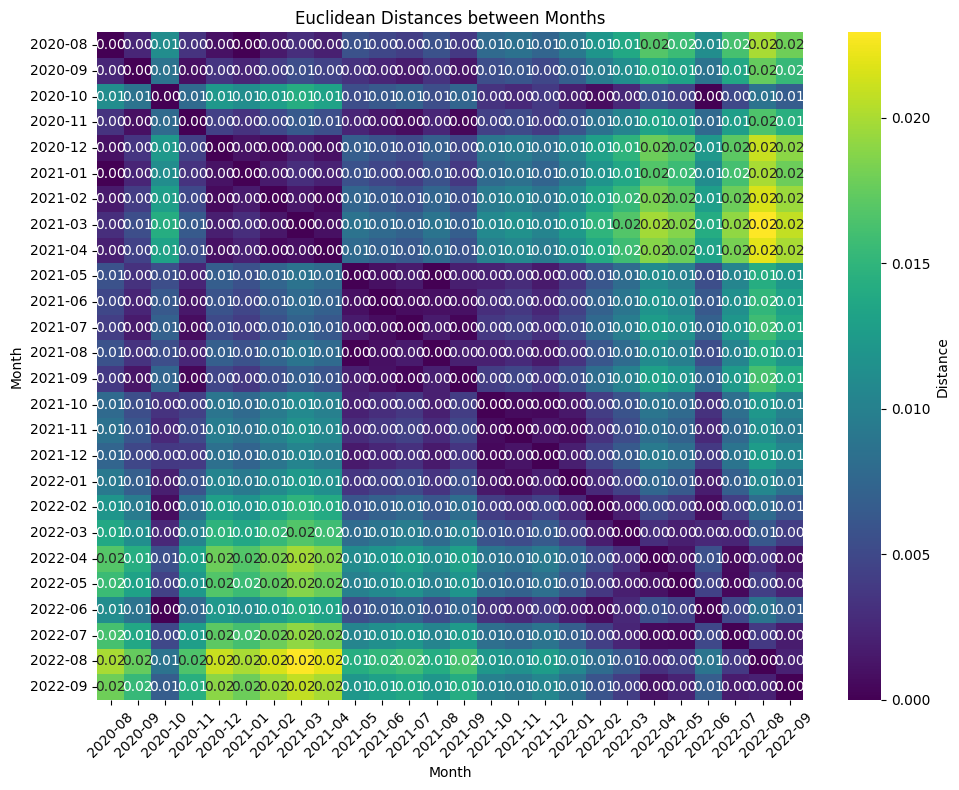

In [251]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(symmetrical_matrix, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Distance'})
plt.title('Euclidean Distances between Months')
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# PCA

In [252]:
# Define a function to parse the string representations into numerical arrays
def parse_embedding(embedding_string):
    # Remove '[' and ',' characters, then split the string by whitespace and convert substrings into floats
    embedding_values = [float(value.strip(',[]')) for value in embedding_string.split()]
    return np.array(embedding_values)

# Apply the parsing function to each element in the 'embedding' column
usa_data['embedding_numeric'] = usa_data['embedding'].apply(parse_embedding)

# Convert the list of numerical arrays into a 2D numerical array
embeddings_array = np.vstack(usa_data['embedding_numeric'])

[0.05090955 0.02948531]


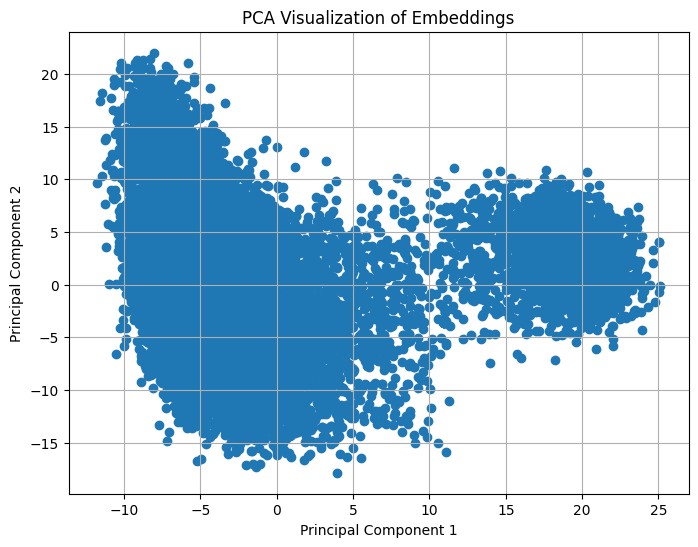

In [253]:
from sklearn.decomposition import PCA

# Convert arrays of embeddings into numerical arrays
# embeddings_array = np.array(usa_data['embedding'].tolist())

# Step 2: Standardize the data
mean_embedding = embeddings_array.mean(axis=0)
std_embedding = embeddings_array.std(axis=0)
standardized_embeddings = (embeddings_array - mean_embedding) / std_embedding

# Step 3: Perform PCA with the maximum number of components
pca = PCA(n_components=2)

# Fit PCA to the standardized embeddings
pca.fit(standardized_embeddings)
print(pca.explained_variance_ratio_)

# Transform the embeddings to the reduced-dimensional space
embeddings_pca = pca.transform(standardized_embeddings)

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
plt.title('PCA Visualization of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


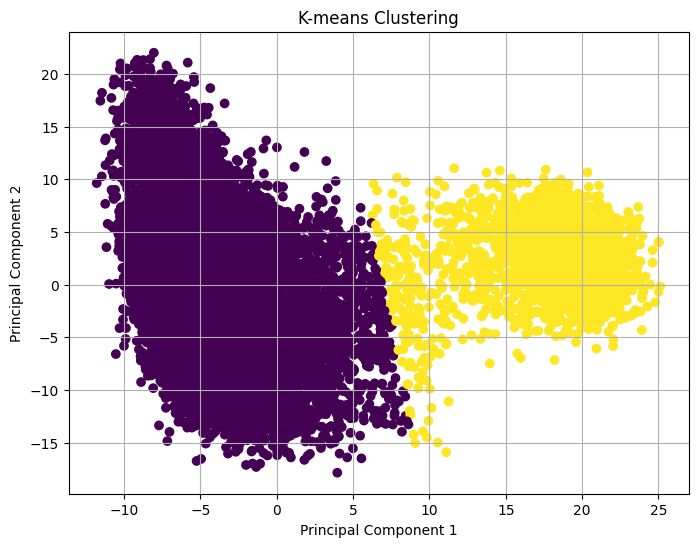

In [254]:
from sklearn.cluster import KMeans

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings_pca)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Visualize the clusters on the PCA scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [255]:
# n_clusters = 3
# kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(embeddings_pca)

# # Get the cluster labels assigned to each data point
# cluster_labels = kmeans.labels_

# # Visualize the clusters on the PCA scatterplot
# plt.figure(figsize=(8, 6))
# plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=cluster_labels, cmap='viridis')
# plt.title('K-means Clustering')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.grid(True)
# plt.show()

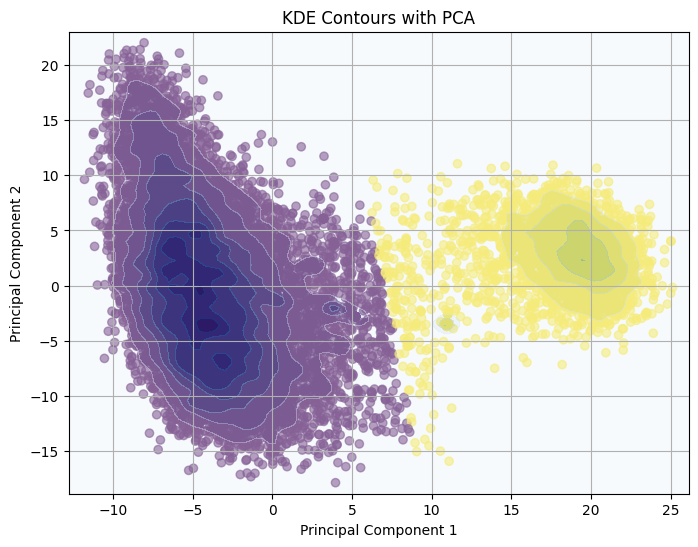

In [256]:
from sklearn.neighbors import KernelDensity

# Fit Kernel Density Estimation (KDE) to the PCA-transformed data
kde = KernelDensity(bandwidth=0.5)  
kde.fit(embeddings_pca)

# Define a grid of points for evaluation
x_min, x_max = embeddings_pca[:, 0].min() - 1, embeddings_pca[:, 0].max() + 1
y_min, y_max = embeddings_pca[:, 1].min() - 1, embeddings_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Evaluate the KDE at each point on the grid
kde_scores = np.exp(kde.score_samples(grid_points))
kde_scores = kde_scores.reshape(xx.shape)

# Visualize the KDE contours overlaid on the PCA scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.contourf(xx, yy, kde_scores, cmap='Blues', alpha=0.4)  # Adjust contour colors and transparency
plt.title('KDE Contours with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [257]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('inferno')
rgba = cmap(0.5)
rgba

/tmp/ipykernel_33/634865272.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


(0.735683, 0.215906, 0.330245, 1.0)

In [258]:
cmap(0)

(0.001462, 0.000466, 0.013866, 1.0)

In [259]:
df_months = pd.DataFrame()
df_months['month'] = usa_data['date_only'].dt.month
df_months['year'] =  usa_data['date_only'].dt.year

df_months['month-year'] = df_months['month'].apply(str) + df_months['year'].apply(str)
uq = pd.unique(df_months['month-year'])
cmap = mpl.cm.get_cmap('inferno')
rgbas = [cmap(n) for n in np.linspace(0,1, len(uq))]
new_cmap = {u:rgbas[i] for i, u in enumerate(uq)}

df_months['color'] = df_months['month-year'].map(new_cmap)
df_months['color']

/tmp/ipykernel_33/3939237850.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


0        (0.001462, 0.000466, 0.013866, 1.0)
1        (0.001462, 0.000466, 0.013866, 1.0)
2        (0.001462, 0.000466, 0.013866, 1.0)
3        (0.001462, 0.000466, 0.013866, 1.0)
4        (0.001462, 0.000466, 0.013866, 1.0)
                        ...                 
14191    (0.988362, 0.998364, 0.644924, 1.0)
14192    (0.988362, 0.998364, 0.644924, 1.0)
14193    (0.988362, 0.998364, 0.644924, 1.0)
14194    (0.988362, 0.998364, 0.644924, 1.0)
14195    (0.988362, 0.998364, 0.644924, 1.0)
Name: color, Length: 14196, dtype: object

/tmp/ipykernel_33/891992727.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  hc = plt.colorbar(sm)


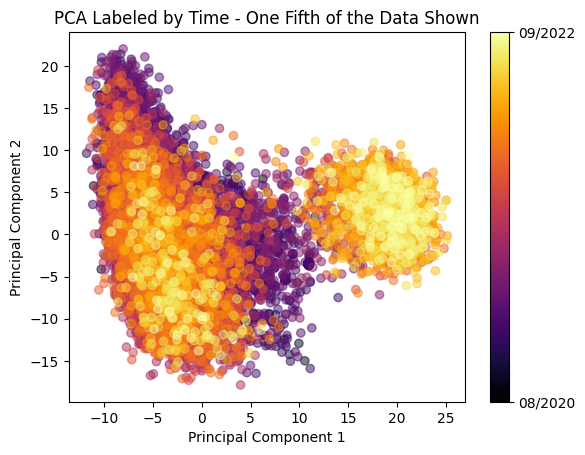

In [260]:
step = 1
plt.scatter(embeddings_pca[::step,0], embeddings_pca[::step,1], c=df_months['color'].to_numpy()[::step], alpha=0.5)
plt.title('PCA Labeled by Time - One Fifth of the Data Shown')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=0, vmax=100)
hc = plt.colorbar(sm)

hc.set_ticks([0, 100])
hc.set_ticklabels(['08/2020', '09/2022'])

plt.show()

#dark is early, light is late a ha ha

/tmp/ipykernel_33/1954644618.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  hc = plt.colorbar(sm)


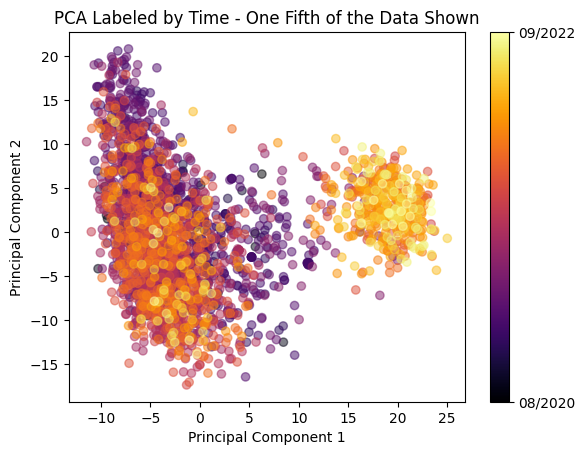

In [261]:
step = 5
plt.scatter(embeddings_pca[::step,0], embeddings_pca[::step,1], c=df_months['color'].to_numpy()[::step], alpha=0.5)
plt.title('PCA Labeled by Time - One Fifth of the Data Shown')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=0, vmax=100)
hc = plt.colorbar(sm)
hc.set_ticks([0, 100])
hc.set_ticklabels(['08/2020', '09/2022'])


# Looking into the top 10 PCA

In [262]:
# pca = PCA(n_components=10)

# pca.fit(standardized_embeddings)

# embeddings_pca = pca.transform(standardized_embeddings)

# print(pca.explained_variance_ratio_)


Out of the top 10 dimensions, the first two account for 5% and 3% of the total varience (so not much)

In [263]:
usa_data.head()

,user_location,date,text,hashtags,raw_text,date_only,clean_text,embedding,embeddings,month,embedding_numeric
0,united states,18-08-2020 03:14,"['clear', 'feel', 'covidvaccine']",['covidvaccine'],Just so we’re clear on how I feel about a #cov...,2020-08-18,just so we’re clear on how i feel about a #cov...,"[-0.013506374321877956, -0.04608927294611931, ...",[-0.013506374321877956],2020-08,"[-0.013506374321877956, -0.04608927294611931, ..."
1,united states,17-08-2020 17:52,"['enrolled', 'pivotal', 'phase', 'clinical', '...",['CovidVaccine'],Just enrolled into a pivotal phase 3 clinical ...,2020-08-17,just enrolled into a pivotal phase clinical t...,"[0.005004002712666988, -0.050803299993276596, ...",[0.005004002712666988],2020-08,"[0.005004002712666988, -0.050803299993276596, ..."
2,massachusetts,17-08-2020 16:42,"['gern', 'today', 'either', 'going', 'cure', '...",['BloodCancer'],$GERN up 7% today.... It's either going to cur...,2020-08-17,$gern up % today.... it's either going to cure...,"[0.0024901358410716057, 0.028662126511335373, ...",[0.0024901358410716057],2020-08,"[0.0024901358410716057, 0.028662126511335373, ..."
3,usa,16-08-2020 18:22,"['silent', 'killer', 'like', 'directedenergywe...","['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...",#5G the silent killer just like #DirectedEnerg...,2020-08-16,# the silent killer just like #directedenergyw...,"[0.01767062582075596, 0.03625344857573509, -0....",[0.01767062582075596],2020-08,"[0.01767062582075596, 0.03625344857573509, -0...."
4,united states,16-08-2020 01:02,"['bingo', 'card', 'vaccines', 'covidvaccine']","['vaccines', 'COVID19', 'CovidVaccine']",Who had this on their 2020 bingo card? #vaccin...,2020-08-16,who had this on their bingo card? #vaccines #...,"[-0.015944167971611023, -0.030504394322633743,...",[-0.015944167971611023],2020-08,"[-0.015944167971611023, -0.030504394322633743,..."


In [264]:
standardized_embeddings

array([[-0.47585466, -0.96513486, -2.50342998, ...,  1.12323677,
         0.01948746,  0.27468898],
       [ 0.27395803, -1.15611343, -0.27237118, ..., -0.03345977,
        -0.41735891, -0.77648026],
       [ 0.17212708,  2.06325566, -0.22185641, ...,  0.23953299,
         0.98377092,  0.75184165],
       ...,
       [ 1.39879355,  0.80628501,  1.56031393, ..., -1.37780203,
         0.71517817, -0.61171506],
       [-0.07568335,  0.84376322,  0.56480782, ..., -0.43348748,
         1.25223299, -1.08106644],
       [-1.6173906 , -1.49451309,  0.26728966, ..., -2.4064767 ,
        -0.5135309 ,  1.76780645]])

In [265]:
embeddings_pca

array([[-9.33601136,  1.51838953],
       [-4.68319054, 10.9382669 ],
       [ 0.31657106,  1.99751259],
       ...,
       [ 0.37716318, -9.78363401],
       [-3.2622766 , -9.11535234],
       [-3.14897695,  2.82367679]])

In [266]:
# Iterate through each point and check if it falls within the specified range
indices_within_left_range = []
for index, point in enumerate(embeddings_pca):
    x, y = point
    if ((x >= -5) and (x<=-4)) and ((y >= -5) and (y<=-4)):  # Change the condition as needed
        indices_within_left_range.append(index)

# Print the indices of points that fall within the specified range
print("Indices of points within the range:", indices_within_left_range)

Indices of points within the range: [31, 45, 97, 109, 133, 151, 158, 533, 741, 832, 932, 1533, 1852, 2217, 2751, 2807, 2924, 3016, 3417, 3612, 3766, 4359, 4769, 4803, 5216, 5331, 5515, 5668, 5676, 6021, 6162, 6309, 6565, 6613, 6642, 6700, 6769, 6792, 6851, 7126, 7232, 7257, 7353, 7380, 7540, 7564, 7801, 7894, 7906, 8029, 8116, 8340, 8374, 8431, 8589, 8613, 8678, 8818, 8931, 9077, 9117, 9563, 9797, 9873, 10417, 10594, 11237, 11678, 11683, 11914, 12446, 12474, 12492, 12502, 12556, 13243, 13517, 13605, 13871, 14186]


In [267]:
for idx in indices_within_left_range:
    print(usa_data.iloc[idx]['raw_text'])
    print()

Definitely not something you should Putin your body. #RussiaVaccine #COVIDVaccine

https://t.co/7DJzWJC8hk

It's not medically feasible to have a safe #CovidVaccine by November.

.@FoxNews @WhiteHouse I'm a registered nurse. When #DrAnthonyFauci can supervise &amp; administer to every #FoxNews @… https://t.co/YdpJWlpZLE

While we are the first to advocate for universal vaccines, the push to align a #COVIDvaccine on a political timetab… https://t.co/On1EJnMpGp

What not 2 weeks??? @realDonaldTrump  #covidvaccine https://t.co/gws60SI6KS

They’ve taken the risk.... but can their data be trusted?#COVID19 #CovidVaccine #ChinaVirus  https://t.co/DODNWeBepx

Fauci upholds coronavirus vaccine projection timeline https://t.co/GzE5zEbUVo #FoxNews via @FoxNews #vaxnews… https://t.co/gew5BF7X2a

Today I witnessed the most blatant social pressure propaganda. When someone gets the #covid vaccine and is asked to… https://t.co/kj0DhFm1cK

@thehill horseshit, there's plenty of tests and thousands of #C

In [268]:
# Iterate through each point and check if it falls within the specified range
indices_within_right_range = []
for index, point in enumerate(embeddings_pca):
    x, y = point
    if ((x >= 19) and (x<=20)) and ((y >= 2) and (y<=3)):  # Change the condition as needed
        indices_within_right_range.append(index)

# Print the indices of points that fall within the specified range
print("Indices of points within the range:", indices_within_left_range)

Indices of points within the range: [31, 45, 97, 109, 133, 151, 158, 533, 741, 832, 932, 1533, 1852, 2217, 2751, 2807, 2924, 3016, 3417, 3612, 3766, 4359, 4769, 4803, 5216, 5331, 5515, 5668, 5676, 6021, 6162, 6309, 6565, 6613, 6642, 6700, 6769, 6792, 6851, 7126, 7232, 7257, 7353, 7380, 7540, 7564, 7801, 7894, 7906, 8029, 8116, 8340, 8374, 8431, 8589, 8613, 8678, 8818, 8931, 9077, 9117, 9563, 9797, 9873, 10417, 10594, 11237, 11678, 11683, 11914, 12446, 12474, 12492, 12502, 12556, 13243, 13517, 13605, 13871, 14186]


In [269]:
for idx in indices_within_right_range:
    print(usa_data.iloc[idx]['raw_text'])
    print()

No statehood day celebrations owing to pandemic, curfew: Goa CM https://t.co/LRpjfQmWP5 #Mamata #Politics #CovidVaccine #Telangana #IndiaLockdown

Sushant case: Flatmate Pithani arrested, sent to 5 day NCB custody https://t.co/oKqfj5oxQ8 #KCR #coronaviruspandemic #CovidVaccine #Politics #Indiafightscorona

Several TDP leaders in Andhra put under house arrest https://t.co/uPEmNsqudf #Lockdown #ktr #Telangana #CovidVaccine #CovidImpact

HC asks Centre to decide representation on plea for evacuation of Indians, Afghans https://t.co/pPvOUQ2LPY #IndiaCovid #Breakingnews #Tndiapolitics #AndhraPolitics #Aryan #NewsFeed #CovidVaccine #Iphone13 

New Delhi, Oct 27 - The Delhi High Court on Wednesday directed the Cen…

'Sardar Patel Leadership Centre' at Mussoorie dedicated to nation https://t.co/W9MVkLJXvH #RahulGandhi #Breakingnews #Tndiapolitics #AndhraPolitics #Aryan #NewsFeed  #RipAppu #PowerStar #PuneethRajKumar #memes #CovidVaccine 

New Delhi/Mussoorie, Oct 31 - On the occasion of Ra…

H

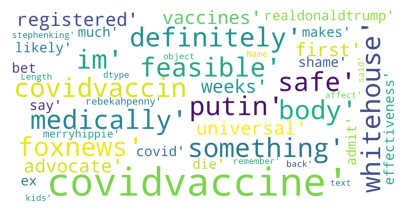

In [270]:
left_cluster = usa_data.iloc[indices_within_left_range]
make_word_cloud(left_cluster)

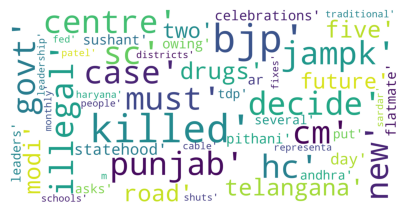

In [271]:
right_cluster = usa_data.iloc[indices_within_right_range]
make_word_cloud(right_cluster)